In [1]:
# Basic Imports
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load CSV file
abalone = pd.read_csv("abalone.csv")

In [3]:
# This is just to have a look at the data
# Should be deleted later
abalone.sample(5)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
1675,I,0.425,0.325,0.105,0.3975,0.1815,0.0810,0.1175,7
3374,M,0.520,0.400,0.165,0.8565,0.2745,0.2010,0.2100,12
1399,M,0.575,0.470,0.150,0.9785,0.4505,0.1960,0.2760,9
1300,I,0.500,0.385,0.120,0.5160,0.1970,0.1305,0.1650,8
2515,F,0.565,0.480,0.175,0.9570,0.3885,0.2150,0.2750,18


In [4]:
# Percentages of each output class ---needs to be sent to .gif file
abalone['Type'].value_counts(normalize=True)*100

Type
M    36.581278
I    32.128322
F    31.290400
Name: proportion, dtype: float64

In [5]:
# Sci-kit learn imports
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [6]:
# Convert dataset to numpy array and split into features/target
dataset = abalone.to_numpy()
X = dataset[:, 1:8]
y = dataset[:, 0]

[Text(0.5, 0.8333333333333334, 'x[5] <= 0.144\ngini = 0.665\nsamples = 3341\nvalue = [1065, 1060, 1216]'),
 Text(0.25, 0.5, 'x[6] <= 0.128\ngini = 0.53\nsamples = 1353\nvalue = [206, 857, 290]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.398\nsamples = 799\nvalue = [65, 602, 132]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.642\nsamples = 554\nvalue = [141, 255, 158]'),
 Text(0.75, 0.5, 'x[3] <= 0.874\ngini = 0.586\nsamples = 1988\nvalue = [859, 203, 926]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.658\nsamples = 508\nvalue = [172, 134, 202]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.543\nsamples = 1480\nvalue = [687, 69, 724]')]

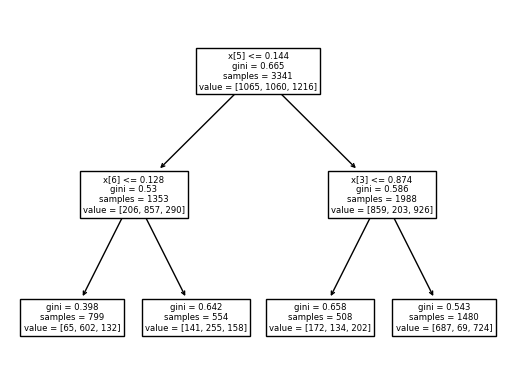

In [7]:
# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

dtc = tree.DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)

# Base DT
tree.plot_tree(dtc)

In [11]:
# Top DT --incomplete
# To-do: Mess with values and display new tree
tree_para = {'criterion':['gini','entropy'],'max_depth':['None',4,8], 'min_samples_split':[5,10]}
clf = GridSearchCV(dtc, tree_para)
clf.fit(X_train,y_train)
clf.best_estimator_

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 4, 8],
                         'min_samples_split': [5, 50]})

DecisionTreeClassifier(max_depth=8, min_samples_split=50)